In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


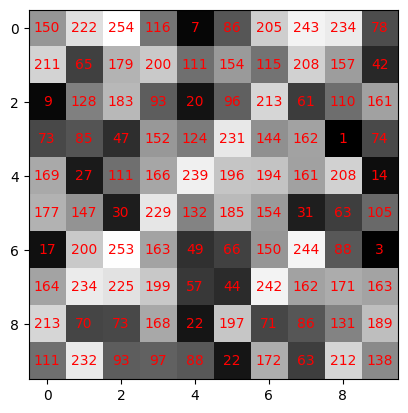

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 10x10 random pixel data
pixel_data = np.random.randint(low=0, high=255, size=(10, 10))

# Display the pixel data as an image with numerical values
fig, ax = plt.subplots()
ax.imshow(pixel_data, cmap='gray')
for i in range(pixel_data.shape[0]):
    for j in range(pixel_data.shape[1]):
        ax.text(j, i, str(pixel_data[i, j]), color='r', ha='center', va='center')

plt.show()

In [126]:
df = pd.read_csv('../Datasets/ultimate_color.csv')
df_test = pd.read_csv('../Datasets/ultimate_color_test.csv')


In [127]:
print(df.columns.tolist())


['Unnamed: 0', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_Mean', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Variance', 'original_glcm_Autocorrelation', 'original_glcm_ClusterProminence', 'original_glcm_ClusterShade', 'original_glcm_ClusterTendency', 'original_glcm_Contrast', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'origi

In [128]:
#sns.countplot(x = 'category', data=df_test, hue = 'category', edgecolor = "black", legend=False, palette = "Set1")

In [129]:
df = df.loc[:, [
'original_glcm_MaximumProbability',
'original_glrlm_LongRunHighGrayLevelEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glszm_LargeAreaEmphasis',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glszm_ZoneEntropy', 'original_shape2D_Sphericity',
'original_firstorder_90Percentile_r',
'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r',
'original_glcm_ClusterShade_r', 'original_glcm_MCC_r',
'original_gldm_LargeDependenceLowGrayLevelEmphasis_r',
'original_gldm_SmallDependenceEmphasis_r',
'original_glrlm_LongRunEmphasis_r',
'original_glrlm_LongRunLowGrayLevelEmphasis_r',
'original_glrlm_ShortRunEmphasis_r',
'original_glrlm_ShortRunLowGrayLevelEmphasis_r',
'original_glszm_LargeAreaHighGrayLevelEmphasis_r',
'original_glszm_LargeAreaLowGrayLevelEmphasis_r',
'original_glszm_SizeZoneNonUniformity_r',
'original_glszm_SmallAreaEmphasis_r',
'original_glszm_SmallAreaLowGrayLevelEmphasis_r',
'original_glszm_ZoneVariance_r', 'original_ngtdm_Busyness_r',
'original_ngtdm_Coarseness_r', 'original_ngtdm_Strength_r',
'original_shape2D_MeshSurface_r',
'original_shape2D_PixelSurface_r', 'original_shape2D_Sphericity_r',
'original_firstorder_10Percentile_g',
'original_firstorder_InterquartileRange_g',
'original_glcm_ClusterShade_g', 'original_glcm_MCC_g',
'original_glcm_MaximumProbability_g',
'original_gldm_SmallDependenceHighGrayLevelEmphasis_g',
'original_glrlm_LongRunHighGrayLevelEmphasis_g',
'original_glrlm_LongRunLowGrayLevelEmphasis_g',
'original_glszm_ZoneEntropy_g', 'original_shape2D_MeshSurface_g',
'original_shape2D_PixelSurface_g',
'original_firstorder_Kurtosis_b',
'original_glcm_ClusterProminence_b',
'original_glcm_ClusterShade_b',
'original_gldm_DependenceNonUniformityNormalized_b',
'original_gldm_LargeDependenceHighGrayLevelEmphasis_b',
'original_glrlm_RunLengthNonUniformity_b',
'original_glszm_LargeAreaEmphasis_b',
'original_glszm_LargeAreaHighGrayLevelEmphasis_b',
'original_ngtdm_Busyness_b', 'original_ngtdm_Coarseness_b',
'original_shape2D_MeshSurface_b',
'original_shape2D_PixelSurface_b',
'category'
                 ]]

df_test = df_test.loc[:, [
'original_glcm_MaximumProbability',
'original_glrlm_LongRunHighGrayLevelEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glszm_LargeAreaEmphasis',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glszm_ZoneEntropy', 'original_shape2D_Sphericity',
'original_firstorder_90Percentile_r',
'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r',
'original_glcm_ClusterShade_r', 'original_glcm_MCC_r',
'original_gldm_LargeDependenceLowGrayLevelEmphasis_r',
'original_gldm_SmallDependenceEmphasis_r',
'original_glrlm_LongRunEmphasis_r',
'original_glrlm_LongRunLowGrayLevelEmphasis_r',
'original_glrlm_ShortRunEmphasis_r',
'original_glrlm_ShortRunLowGrayLevelEmphasis_r',
'original_glszm_LargeAreaHighGrayLevelEmphasis_r',
'original_glszm_LargeAreaLowGrayLevelEmphasis_r',
'original_glszm_SizeZoneNonUniformity_r',
'original_glszm_SmallAreaEmphasis_r',
'original_glszm_SmallAreaLowGrayLevelEmphasis_r',
'original_glszm_ZoneVariance_r', 'original_ngtdm_Busyness_r',
'original_ngtdm_Coarseness_r', 'original_ngtdm_Strength_r',
'original_shape2D_MeshSurface_r',
'original_shape2D_PixelSurface_r', 'original_shape2D_Sphericity_r',
'original_firstorder_10Percentile_g',
'original_firstorder_InterquartileRange_g',
'original_glcm_ClusterShade_g', 'original_glcm_MCC_g',
'original_glcm_MaximumProbability_g',
'original_gldm_SmallDependenceHighGrayLevelEmphasis_g',
'original_glrlm_LongRunHighGrayLevelEmphasis_g',
'original_glrlm_LongRunLowGrayLevelEmphasis_g',
'original_glszm_ZoneEntropy_g', 'original_shape2D_MeshSurface_g',
'original_shape2D_PixelSurface_g',
'original_firstorder_Kurtosis_b',
'original_glcm_ClusterProminence_b',
'original_glcm_ClusterShade_b',
'original_gldm_DependenceNonUniformityNormalized_b',
'original_gldm_LargeDependenceHighGrayLevelEmphasis_b',
'original_glrlm_RunLengthNonUniformity_b',
'original_glszm_LargeAreaEmphasis_b',
'original_glszm_LargeAreaHighGrayLevelEmphasis_b',
'original_ngtdm_Busyness_b', 'original_ngtdm_Coarseness_b',
'original_shape2D_MeshSurface_b',
'original_shape2D_PixelSurface_b',
'category'
                 ]]

In [130]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]


In [131]:
X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y,test_size=0.3)

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [133]:
def get_class_distribution(obj):
    count_dict = {
        "akiec": 0,
        "bcc": 0,
        "bkl": 0,
        "df": 0,
        "nv": 0,
        "vasc": 0,
        "mel": 0
    }
    
    for i in obj:
        if i == 0: 
            count_dict['akiec'] += 1
        elif i == 1: 
            count_dict['bcc'] += 1
        elif i == 2: 
            count_dict['bkl'] += 1
        elif i == 3: 
            count_dict['df'] += 1
        elif i == 4: 
            count_dict['nv'] += 1  
        elif i == 5: 
            count_dict['vasc'] += 1 
        elif i == 6:
            count_dict['mel'] += 1           
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Dystrybucja klas w zbiorze testowym')

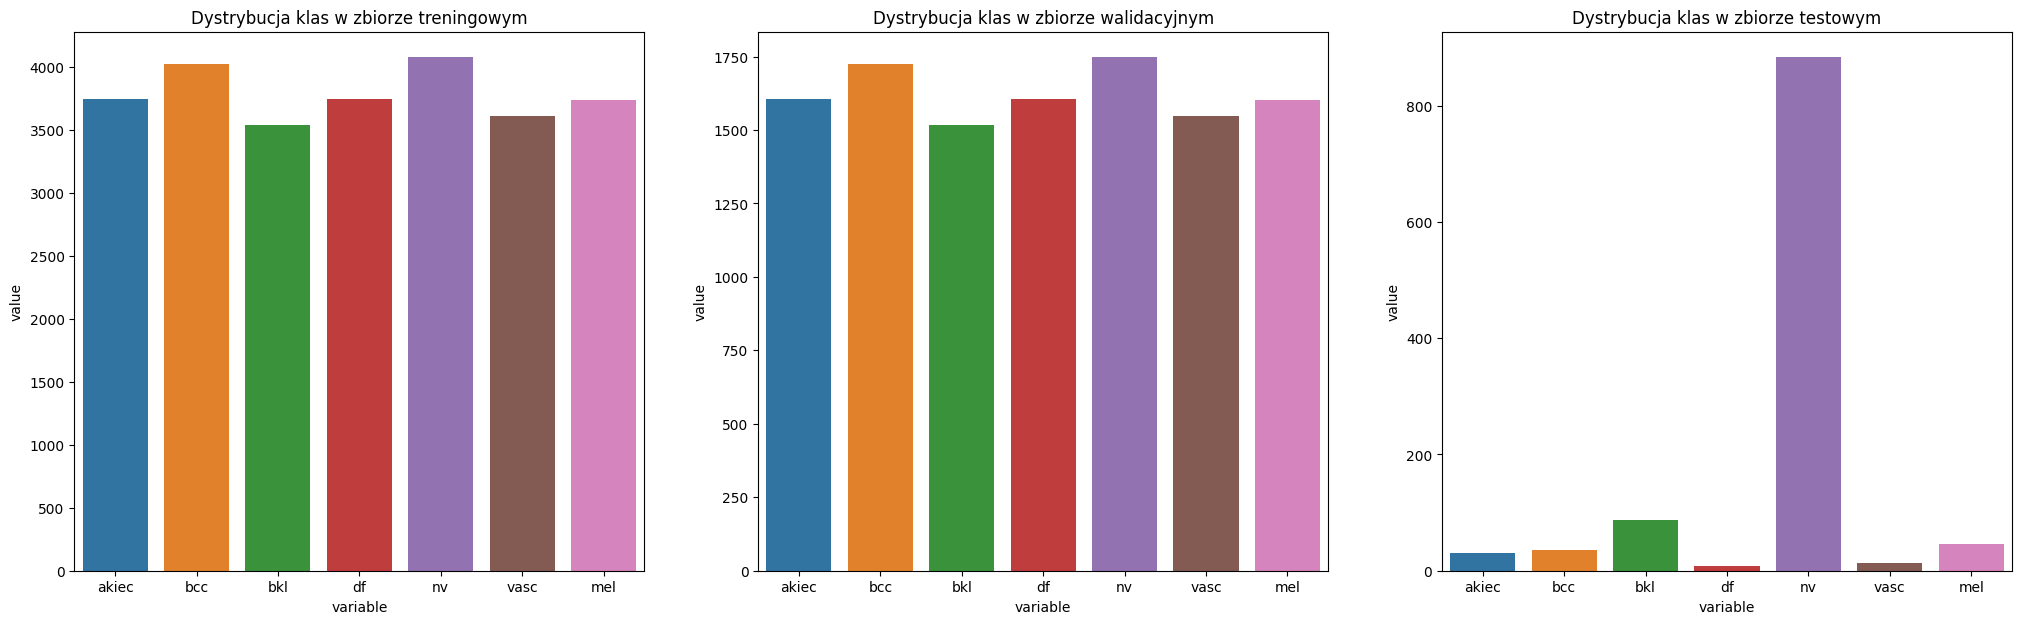

In [134]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Dystrybucja klas w zbiorze treningowym')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Dystrybucja klas w zbiorze walidacyjnym')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Dystrybucja klas w zbiorze testowym')



In [135]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [136]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [137]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 

In [138]:
print(class_weights)

tensor([0.0003, 0.0002, 0.0003, 0.0003, 0.0002, 0.0003, 0.0003])


In [139]:
class_weights_all = class_weights[target_list]

In [140]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [141]:
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 0.0001
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 7

In [142]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)

val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [143]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x
    
    def predict_proba(self, x):
        # Apply softmax activation to get probabilities
        logits = self.forward(x)
        probabilities = torch.softmax(logits, dim=1)
        return probabilities

In [144]:
#device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [145]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)


MulticlassClassification(
  (layer_1): Linear(in_features=53, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=7, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [146]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [147]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [148]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))
        accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
        accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
        print(f'Epoch {e+0:03}: | Train Loss:{train_epoch_loss/len(train_loader):.5f} | Val Loss:{val_epoch_loss/len(val_loader):.5f} | Train Acc:{train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 001: | Train Loss:1.40214 | Val Loss:1.14615 | Train Acc:50.133| Val Acc: 60.300
Epoch 002: | Train Loss:1.12386 | Val Loss:1.05706 | Train Acc:59.258| Val Acc: 63.781
Epoch 003: | Train Loss:1.02756 | Val Loss:0.89681 | Train Acc:62.707| Val Acc: 68.629
Epoch 004: | Train Loss:0.93906 | Val Loss:0.84821 | Train Acc:65.893| Val Acc: 69.414
Epoch 005: | Train Loss:0.88296 | Val Loss:0.80692 | Train Acc:67.825| Val Acc: 70.613
Epoch 006: | Train Loss:0.85551 | Val Loss:0.75538 | Train Acc:68.745| Val Acc: 73.398
Epoch 007: | Train Loss:0.80971 | Val Loss:0.74098 | Train Acc:70.470| Val Acc: 73.354
Epoch 008: | Train Loss:0.78795 | Val Loss:0.71839 | Train Acc:70.786| Val Acc: 73.962
Epoch 009: | Train Loss:0.75485 | Val Loss:0.70154 | Train Acc:72.533| Val Acc: 74.632
Epoch 010: | Train Loss:0.74698 | Val Loss:0.68551 | Train Acc:72.368| Val Acc: 75.416
Epoch 011: | Train Loss:0.73741 | Val Loss:0.66261 | Train Acc:72.853| Val Acc: 76.518
Epoch 012: | Train Loss:0.71216 | Val Loss:

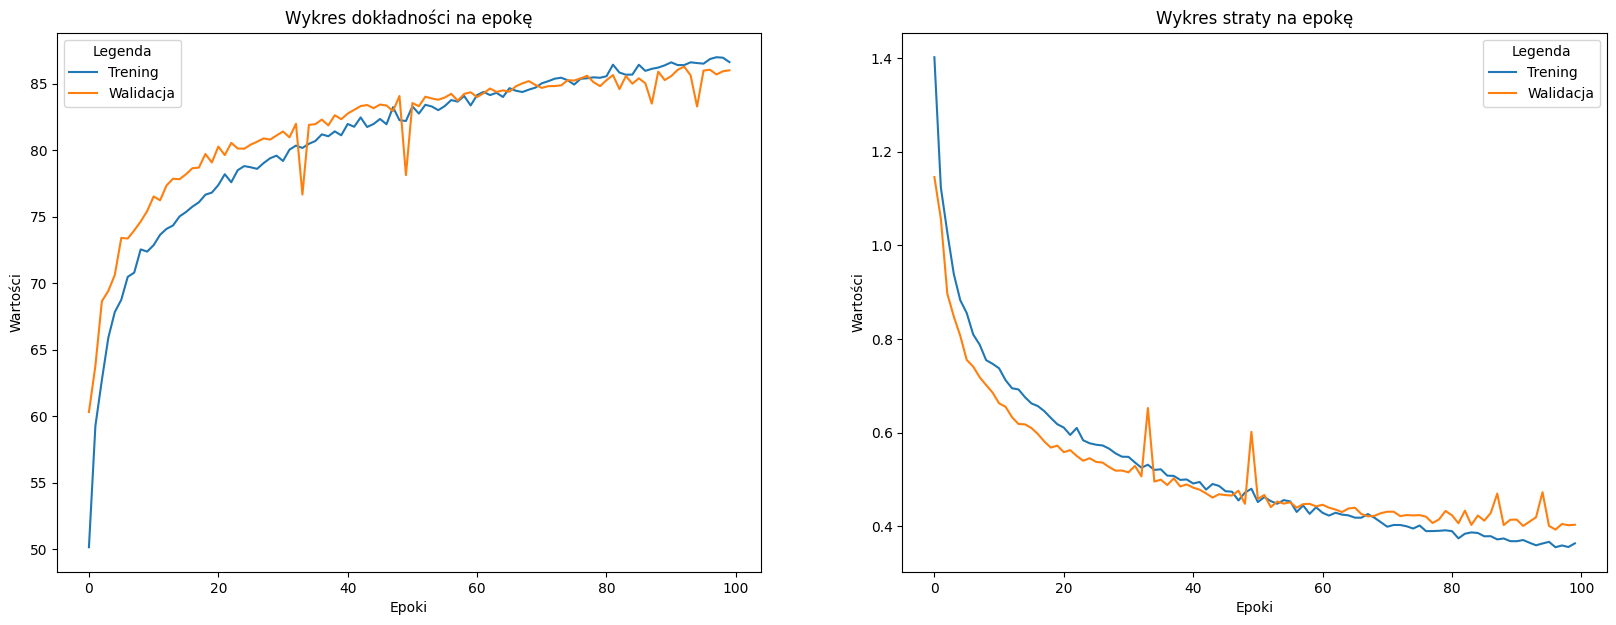

In [149]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"Epoki", })
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"Epoki"})
train_val_acc_df.rename(columns={"variable": "zmienna", "value":"wartosc"}, inplace=True)
train_val_acc_df['zmienna'] = train_val_acc_df['zmienna'].replace('val', 'Walidacja', regex=True)
train_val_acc_df['zmienna'] = train_val_acc_df['zmienna'].replace('train', 'Trening', regex=True)
train_val_loss_df.rename(columns={"variable": "zmienna", "value":"wartosc"}, inplace=True)
train_val_loss_df['zmienna'] = train_val_acc_df['zmienna'].replace('val', 'Walidacja', regex=True)
train_val_loss_df['zmienna'] = train_val_acc_df['zmienna'].replace('train', 'Trening', regex=True)
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "Epoki", y="wartosc", hue="zmienna",  ax=axes[0]).set_title('Wykres dokładności na epokę')
sns.lineplot(data=train_val_loss_df, x = "Epoki", y="wartosc", hue="zmienna", ax=axes[1]).set_title('Wykres straty na epokę')
axes[0].set_ylabel('Wartości')  # Customize y-axis label for the first subplot
axes[0].legend(title='Legenda')
axes[1].set_ylabel('Wartości')  # Customize y-axis label for the second subplot
axes[1].legend(title='Legenda')


In [150]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [151]:
print(classification_report(y_test.tolist(), y_pred_list))


              precision    recall  f1-score   support

           0       0.38      0.30      0.33        30
           1       0.40      0.63      0.49        35
           2       0.40      0.62      0.49        88
           3       0.10      0.50      0.16         8
           4       0.99      0.79      0.88       883
           5       0.42      0.62      0.50        13
           6       0.32      0.83      0.47        46

    accuracy                           0.76      1103
   macro avg       0.43      0.61      0.47      1103
weighted avg       0.86      0.76      0.79      1103



In [152]:
report = classification_report(y_test.tolist(), y_pred_list, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.astype({'support':'int'})
report_df = report_df.rename(columns={'precision': 'precyzja', 'recall': 'czułość', 'f1-score': 'miara F1', 'support': 'poparcie'})
report_df = report_df.drop('accuracy')
report_df = report_df.drop('macro avg')
report_df = report_df.drop('weighted avg')


In [153]:
display(report_df)

,precyzja,czułość,miara F1,poparcie
0,0.375000,0.300000,0.333333,30
1,0.400000,0.628571,0.488889,35
2,0.404412,0.625000,0.491071,88
3,0.095238,0.500000,0.160000,8
4,0.987324,0.793884,0.880100,883
5,0.421053,0.615385,0.500000,13
6,0.324786,0.826087,0.466258,46


In [154]:
import dataframe_image as dfi
dfi.export(report_df, "table.png", table_conversion='matplotlib')

In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

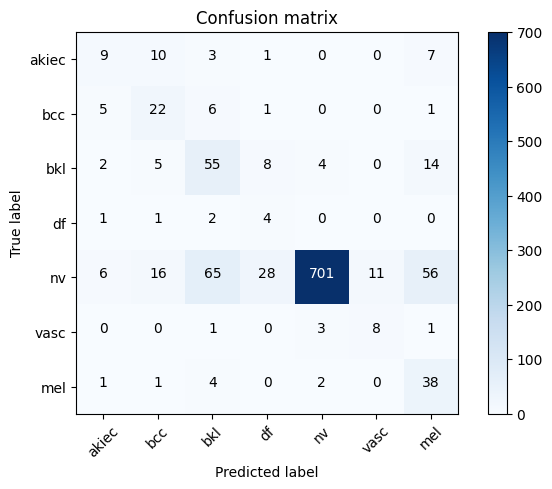

In [156]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_list)
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']
plot_confusion_matrix(confusion_mtx, plot_labels)

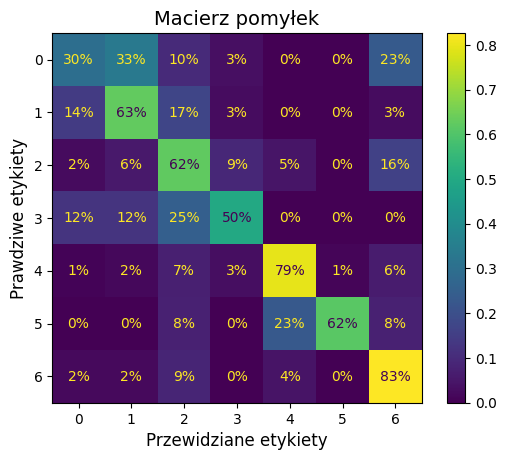

In [157]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_list, normalize='true', values_format=".0%")
# Customize axis labels
plt.xlabel('Przewidziane etykiety', fontsize=12)
plt.ylabel('Prawdziwe etykiety', fontsize=12)
plt.title('Macierz pomyłek', fontsize=14)

# Show the plot
plt.show()

In [158]:
confusion_mtx


array([[  9,  10,   3,   1,   0,   0,   7],
       [  5,  22,   6,   1,   0,   0,   1],
       [  2,   5,  55,   8,   4,   0,  14],
       [  1,   1,   2,   4,   0,   0,   0],
       [  6,  16,  65,  28, 701,  11,  56],
       [  0,   0,   1,   0,   3,   8,   1],
       [  1,   1,   4,   0,   2,   0,  38]], dtype=int64)

In [159]:
y_prob = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model.predict_proba(X_batch)
        #y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_prob.append(y_test_pred.cpu().numpy())
y_prob = [a.squeeze().tolist() for a in y_prob]

In [160]:
my_array = np.array(y_prob, dtype=float)
my_array /= my_array.sum(axis=1, keepdims=True)

In [161]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_test, classes=np.arange(7))

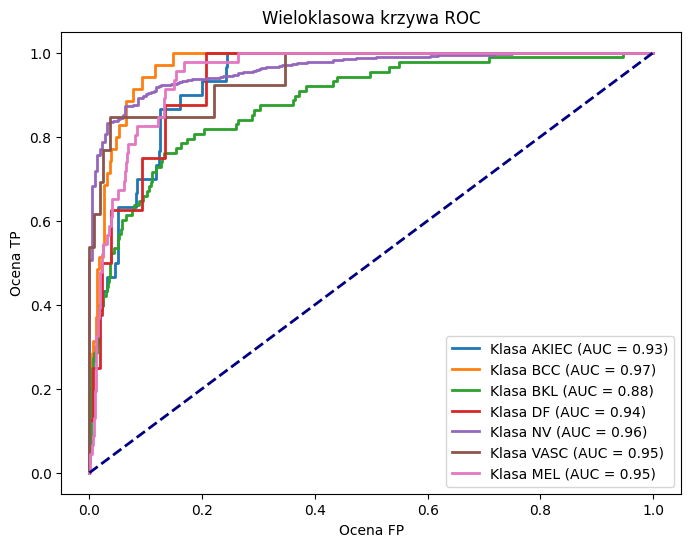

In [162]:
lesion_classes = ['AKIEC', 'BCC', 'BKL', 'DF', 'NV', 'VASC', 'MEL']
# Compute ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(7):
    fpr, tpr, thresholds = roc_curve(y_true_bin[:, i], my_array[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Klasa {lesion_classes[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ocena FP')
plt.ylabel('Ocena TP')
plt.title('Wieloklasowa krzywa ROC')
plt.legend(loc='lower right')
plt.show()


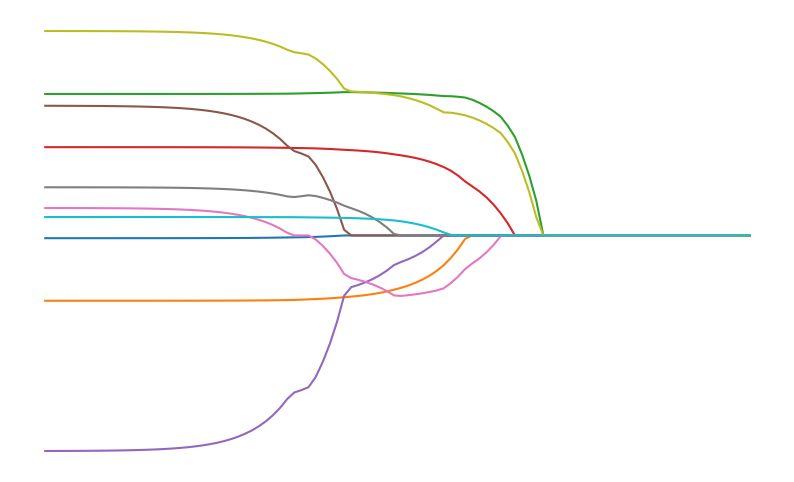

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load a sample dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Standardize the features
X = StandardScaler().fit_transform(X)

# Create a range of alpha values
alphas = np.logspace(-4, 4, 100)

# Fit Lasso models with different alpha values
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Display results
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alfa (siła regularyzacji)')
plt.ylabel('Współczynniki')
#plt.title('Siła regularyzacji alfa w funckji współczynnika Lasso')
#plt.legend(['Cecha 1', 'Cecha 2', 'Cecha 3', 'Cecha 4', 'Cecha 5',
            #'Cecha 6', 'Cecha 7', 'Cecha 8', 'Cecha 9', 'Cecha 10'])
plt.axis('off')
plt.savefig('lasso.png', transparent=True)
plt.show()

In [164]:
#plt.savefig('lasso.png', transparent=True)